In [1]:
import pandas as pd
data = pd.read_csv("zoo.csv")
data.head()

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [2]:
x = data.drop("1.7",axis=1)
x

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6
0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [3]:
y = data["1.7"]
y

0     1
1     4
2     1
3     1
4     1
     ..
95    1
96    6
97    1
98    7
99    2
Name: 1.7, Length: 100, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [5]:
# make the model of the classfier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

# now we need to have y_pred
y_pred = classifier.predict(x_test)
y_pred

array([2, 1, 6, 6, 1, 4, 1, 1, 2, 3, 1, 1, 1, 4, 1, 4, 6, 3, 6, 2, 2, 1,
       1, 4, 6], dtype=int64)

In [6]:
# now we need to check for the performance
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("accuracy is : ",accuracy_score(y_test,y_pred))
print("\n\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\n\nClassification Report:\n",classification_report(y_test, y_pred))

accuracy is :  0.84


Confusion Matrix:
 [[10  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0  2  0  0  1  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0]]


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         4
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       0.20      1.00      0.33         1
           7       0.00      0.00      0.00         2

    accuracy                           0.84        25
   macro avg       0.60      0.67      0.59        25
weighted avg       0.85      0.84      0.83        25



C:\Users\suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.6, 0.9444444444444444, 'x[3] <= 0.5\ngini = 0.758\nsamples = 75\nvalue = [30, 16, 2, 9, 3, 7, 8]'),
 Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.771\nsamples = 45\nvalue = [0, 16, 2, 9, 3, 7, 8]'),
 Text(0.4, 0.7222222222222222, 'x[11] <= 0.5\ngini = 0.754\nsamples = 29\nvalue = [0, 0, 2, 9, 3, 7, 8]'),
 Text(0.3, 0.6111111111111112, 'x[6] <= 0.5\ngini = 0.685\nsamples = 20\nvalue = [0, 0, 2, 0, 3, 7, 8]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 6, 0]'),
 Text(0.4, 0.5, 'x[7] <= 0.5\ngini = 0.602\nsamples = 14\nvalue = [0, 0, 2, 0, 3, 1, 8]'),
 Text(0.2, 0.3888888888888889, 'x[4] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 1, 8]'),
 Text(0.1, 0.2777777777777778, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 0, 8]'),
 Text(0.3, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]'),
 Text(0.6, 0.3888888888888889, 'x[13] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 2, 0, 3, 0, 0]'),
 Text(0.5, 0.277

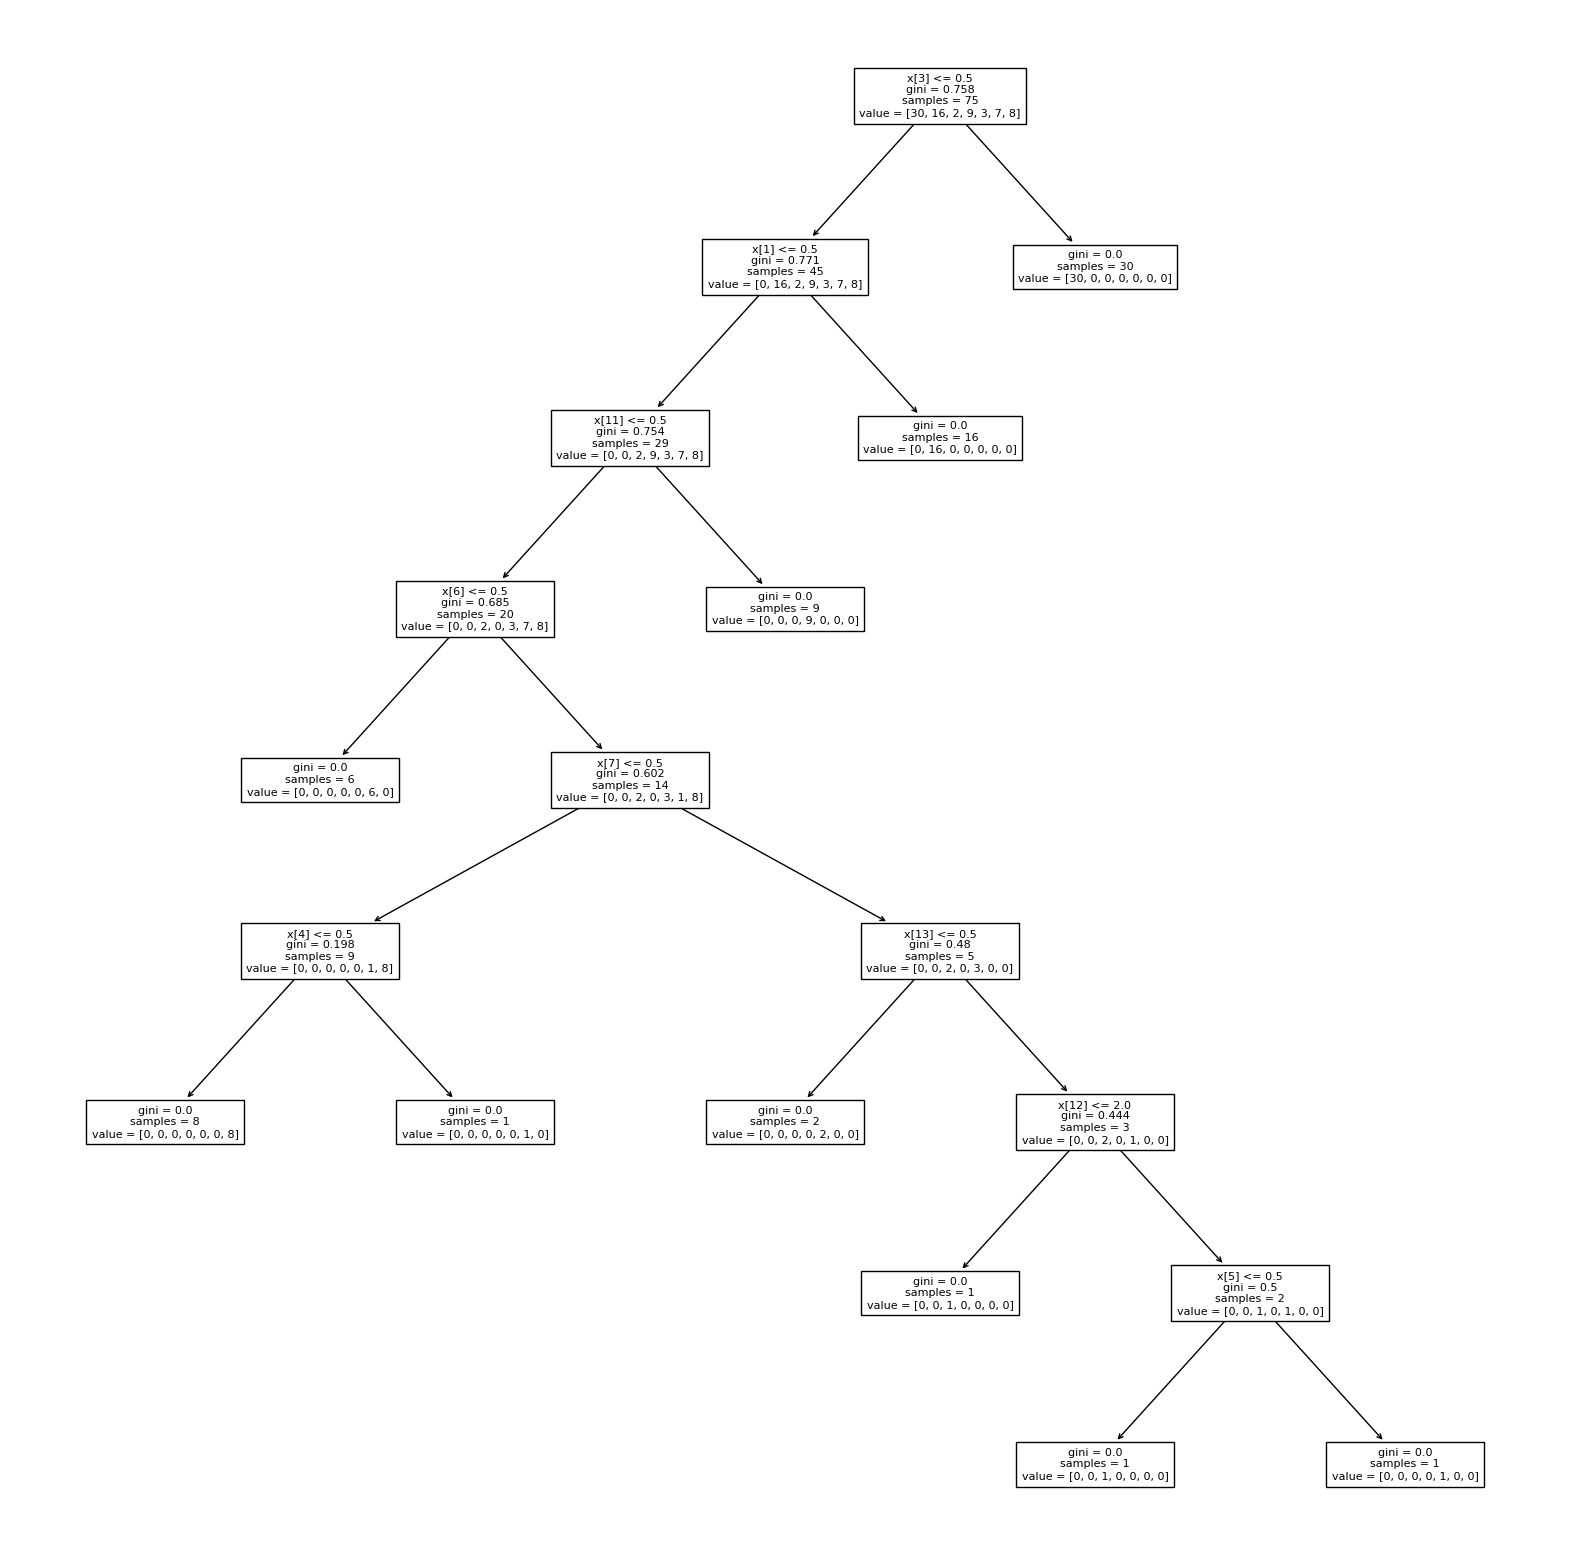

In [8]:
plt.figure(figsize=(20,20))
tree.plot_tree(classifier,fontsize=8)